In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tele=pd.read_csv("Churn.csv", index_col = 0)

In [3]:
tele.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
tele.shape

(5000, 20)

There are 5000 rows and 20 columns

## renaming the columns

In [5]:
tele=tele.rename({'area.code':'area_code','account.length': 'account_length', 'intl.plan':'intl_plan','intl.mins':'intl_mins','intl.charge':'intl_charge','intl.calls':'intl_calls',
                   'voice.plan':'voice_plan','day.calls':'day_calls','day.mins':'day_mins','day.charge':'day_charge',
                   'voice.messages':'voice_messages','eve.mins':'eve_mins','eve.calls':'eve_calls','eve.charge':'eve_charge',
                   'night.mins':'night_mins','night.calls':'night_calls','night.charge':'night_charge','customer.calls':'customer_calls'}
                   ,axis=1)

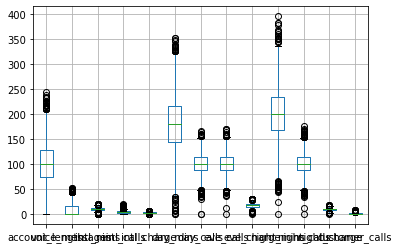

In [6]:
box=tele.boxplot(figsize=(12,5))

In [7]:
tele.dtypes

state              object
area_code          object
account_length      int64
voice_plan         object
voice_messages      int64
intl_plan          object
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
churn              object
dtype: object

In [8]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   object 
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   object 
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   object 
 12  eve_mins        5000 non-null   object 
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

#### state,area_code,voice_plan,intl_plan and churn are categorical values columns
##### datatypes of day_charge and eve_mins are in object,so we have to convert it into numerical

## data conversion

In [9]:
tele['day_charge']=pd.to_numeric(tele['day_charge'],errors='coerce')
tele['eve_mins']=pd.to_numeric(tele['eve_mins'],errors='coerce')

In [10]:
#convert string values(yes and no) of churn column to 1 and 0
tele.loc[tele.churn=='no', 'churn']=0
tele.loc[tele.churn=='yes', 'churn']=1
#convert to integer
tele['churn']=tele['churn'].astype('int32')

In [11]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   object 
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   object 
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      4993 non-null   float64
 12  eve_mins        4976 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

#### converted the day_charge and eve_mins datatypes

In [12]:
tele.describe()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400,0.141400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363,0.348469
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000,0.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000,0.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000,0.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000,1.000000


## check duplicates

In [13]:
tele[tele.duplicated()].shape

(0, 20)

There are no duplicate values

## Missing value & imputation

<AxesSubplot:>

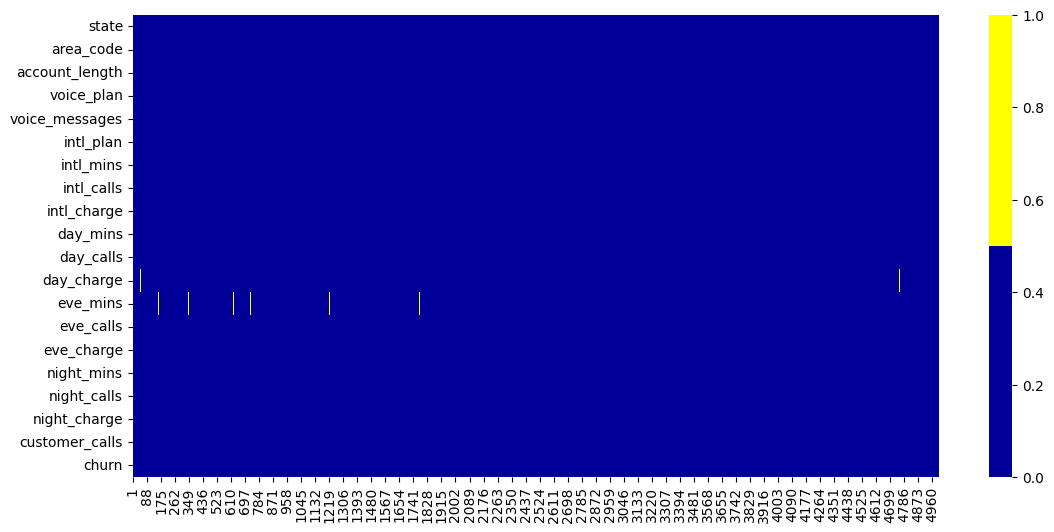

In [14]:
plt.figure(figsize=[13,6])
cols=tele.columns
colours=['#000099','#ffff00']
sns.heatmap(tele[cols].isnull().transpose(),cmap=sns.color_palette(colours))

In [15]:
tele.isnull().sum()

state              0
area_code          0
account_length     0
voice_plan         0
voice_messages     0
intl_plan          0
intl_mins          0
intl_calls         0
intl_charge        0
day_mins           0
day_calls          0
day_charge         7
eve_mins          24
eve_calls          0
eve_charge         0
night_mins         0
night_calls        0
night_charge       0
customer_calls     0
churn              0
dtype: int64

In [16]:
tele[tele['day_charge'].isnull()]

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
13,IA,area_code_408,168,no,0,no,11.2,2,3.02,128.8,96,NaN,104.9,71,8.92,141.1,128,6.35,1,0
28,MT,area_code_408,54,no,0,no,14.7,4,3.97,134.3,73,NaN,155.5,100,13.22,102.1,68,4.59,3,0
48,DE,area_code_408,142,no,0,no,7.4,5,2.00,187.0,133,NaN,134.6,74,11.44,242.2,127,10.90,2,0
4408,TN,area_code_415,125,no,0,no,7.7,3,2.08,138.5,96,NaN,159.7,117,13.57,212.7,91,9.57,2,0
4756,OK,area_code_408,17,no,0,no,14.8,5,4.00,180.4,121,NaN,228.5,111,19.42,199.5,99,8.98,0,0
4966,NC,area_code_408,92,no,0,no,10.7,2,2.89,192.1,87,NaN,193.0,122,16.41,133.4,79,6.00,1,0
4993,MT,area_code_415,83,no,0,no,10.3,6,2.78,188.3,70,NaN,243.8,88,20.72,213.7,79,9.62,0,0


In [17]:
tele[tele['eve_mins'].isnull()]

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
90,NJ,area_code_415,128,no,0,no,13.9,4,3.75,237.9,125,40.44,NaN,93,21.05,208.9,68,9.40,1,1
103,VT,area_code_415,135,no,0,no,10.5,6,2.84,151.7,82,25.79,NaN,105,10.12,180.0,100,8.10,0,0
111,MI,area_code_408,120,no,0,no,8.3,8,2.24,165.0,100,28.05,NaN,83,26.96,119.2,86,5.36,1,0
160,FL,area_code_510,115,yes,24,no,9.6,4,2.59,142.1,124,24.16,NaN,129,15.59,164.8,114,7.42,1,0
232,OH,area_code_415,63,yes,36,yes,11.0,6,2.97,199.0,110,33.83,NaN,111,24.76,197.6,92,8.89,1,0
255,TX,area_code_415,97,no,0,yes,10.9,3,2.94,143.7,117,24.43,NaN,82,23.21,178.3,81,8.02,0,0
300,MN,area_code_415,94,no,0,no,6.6,5,1.78,181.5,98,30.86,NaN,88,16.99,287.7,114,12.95,1,0
346,VA,area_code_415,141,no,0,no,7.2,8,1.94,260.2,131,44.23,NaN,120,15.23,135.0,119,6.08,3,0
461,UT,area_code_415,90,no,0,no,9.6,5,2.59,261.8,128,44.51,NaN,104,18.75,136.6,91,6.15,1,0
558,TX,area_code_408,58,yes,20,no,9.5,2,2.57,194.5,110,33.07,NaN,89,18.16,236.6,92,10.65,1,0


In [18]:
day_mean=tele['day_charge'].mean()
eve_mean=tele['eve_mins'].mean()

In [19]:
day_mean

30.653500901261765

In [20]:
eve_mean

200.58032556270098

In [21]:
tele['day_charge']=tele['day_charge'].fillna(day_mean)
tele['eve_mins']=tele['eve_mins'].fillna(eve_mean)

In [22]:
tele.isnull().sum()

state             0
area_code         0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl_mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churn             0
dtype: int64

In [23]:
data_box=tele.day_charge

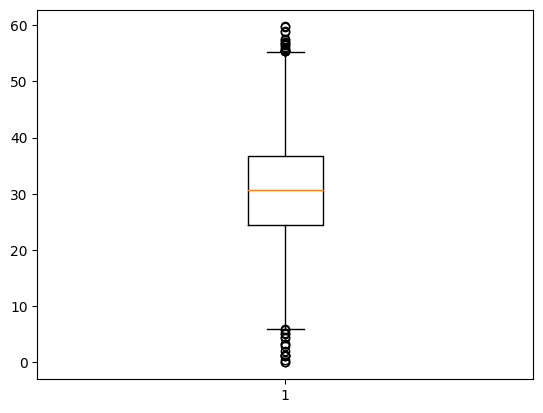

In [24]:
box=plt.boxplot(data_box)

In [25]:
[item.get_ydata() for item in box['fliers']]

[array([ 5.25,  5.78,  2.13,  4.4 ,  0.  ,  0.  ,  3.32,  1.34,  4.59,
         2.99,  0.44,  1.33,  3.21,  5.08,  1.12,  5.87,  1.22, 56.59,
        57.36, 55.51, 59.64, 57.04, 56.83, 58.96, 56.07, 55.78, 55.47,
        58.7 , 57.53, 55.44, 55.32, 59.76, 56.46, 55.34])]

In [26]:
data_box1=tele.eve_mins

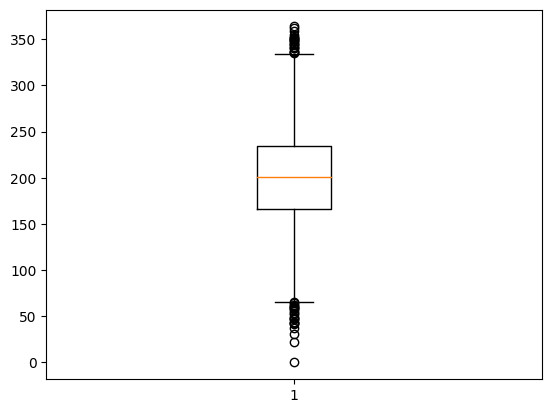

In [27]:
box1=plt.boxplot(data_box1)

In [28]:
[item.get_ydata() for item in box1['fliers']]

[array([ 61.9,  31.2,  64.3,  42.2,  58.9,  43.9,  52.9,  42.5,  60.8,
         58.6,  56. ,  48.1,  60. ,  65.2,  49.2,   0. ,  22.3,  58.3,
         37.8,  41.7,  47.3,  53.2,  47.3, 348.5, 351.6, 350.5, 337.1,
        335. , 347.3, 336. , 350.9, 339.9, 361.8, 335.7, 354.2, 363.7,
        341.3, 344. , 349.4, 348.9, 344.9, 352.1, 345.1, 359.3, 340.3])]

In [29]:
tele['churn'].unique()

array([0, 1])

In [30]:
print(tele.churn.value_counts())

0    4293
1     707
Name: churn, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

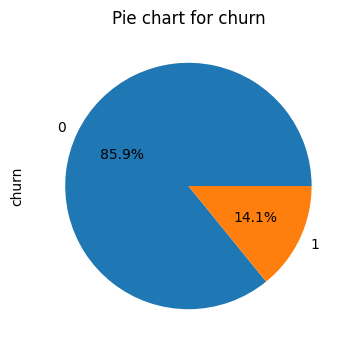

In [31]:
tele['churn'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(4,4))
plt.title("Pie chart for churn")
plt.show

#### 14.1% customers are getting churn

## analyzing state column

In [32]:
tele['state'].nunique()

51

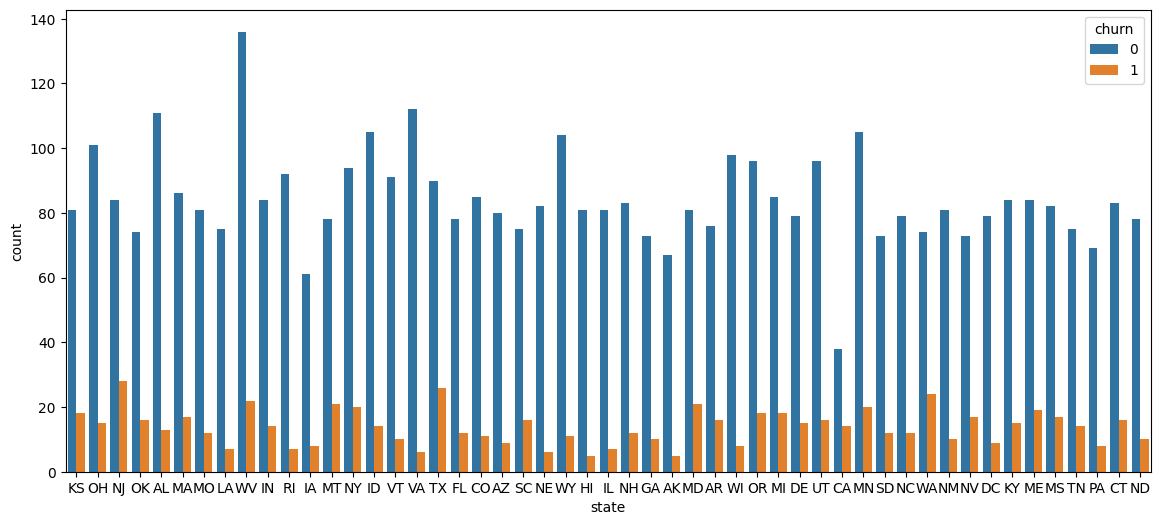

In [33]:
plt.figure(figsize=[14,6])
an_state=sns.countplot(x='state',hue='churn',data=tele)
plt.show()

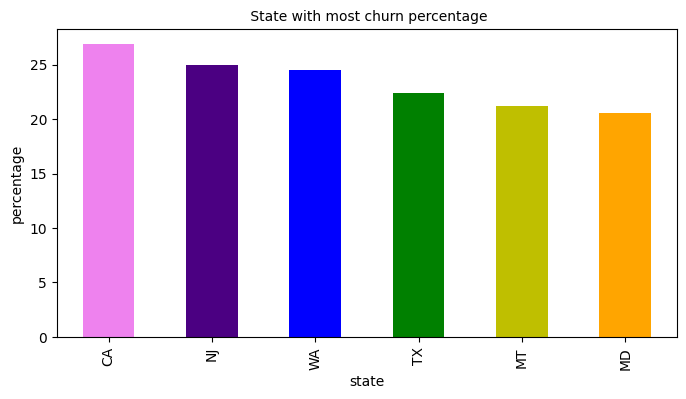

In [34]:
plt.rcParams['figure.figsize'] = (8,4)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((tele.groupby(['state'])['churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 10)
plt.xlabel('state', fontsize = 10)
plt.ylabel('percentage', fontsize = 10)
plt.show()

In [35]:
#calculate State vs Churn percentage
State_data = pd.crosstab(tele["state"],tele["churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

churn    0   1  Percentage_Churn
state                           
AK      67   5          6.944444
AL     111  13         10.483871
AR      76  16         17.391304
AZ      80   9         10.112360
CA      38  14         26.923077
CO      85  11         11.458333
CT      83  16         16.161616
DC      79   9         10.227273
DE      79  15         15.957447
FL      78  12         13.333333
GA      73  10         12.048193
HI      81   5          5.813953
IA      61   8         11.594203
ID     105  14         11.764706
IL      81   7          7.954545
IN      84  14         14.285714
KS      81  18         18.181818
KY      84  15         15.151515
LA      75   7          8.536585
MA      86  17         16.504854
MD      81  21         20.588235
ME      84  19         18.446602
MI      85  18         17.475728
MN     105  20         16.000000
MO      81  12         12.903226
MS      82  17         17.171717
MT      78  21         21.212121
NC      79  12         13.186813
ND      78

In [36]:
#show the most churn state of top 10 by ascending the above list
tele.groupby(['state'])['churn'].mean().sort_values(ascending = False).head(10)

state
CA    0.269231
NJ    0.250000
WA    0.244898
TX    0.224138
MT    0.212121
MD    0.205882
NV    0.188889
ME    0.184466
KS    0.181818
OK    0.177778
Name: churn, dtype: float64

#### There are 51 unique states.
#### from above plot we can understand CA,NJ,WA,TX,MT,MD have higher churn rate

In [37]:
tele['area_code'].nunique()

3

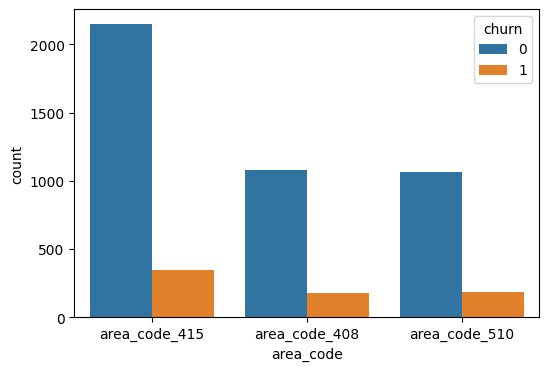

In [38]:
plt.figure(figsize=[6,4])
an_state=sns.countplot(x='area_code',hue='churn',data=tele)
plt.show()

In [39]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(tele["area_code"],tele["churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

churn             0    1  Percentage_Churn
area_code                                 
area_code_408  1082  177         14.058777
area_code_415  2149  346         13.867735
area_code_510  1062  184         14.767255


##### There are 3 unique area codes and the churn rate of these areacodes are almost similar

In [40]:
#Separating churn and non churn customers
churn_df     = tele[tele["churn"] == bool(True)]
not_churn_df = tele[tele["churn"] == bool(False)]

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

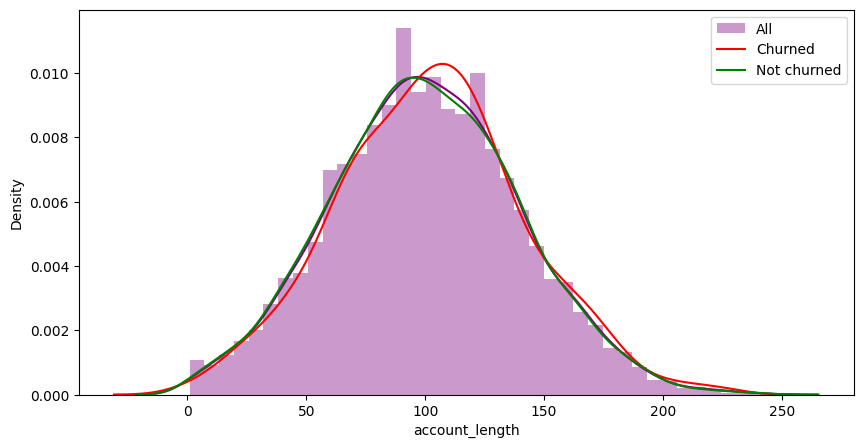

In [41]:
#comparison of churned account length and not churned account length 
plt.figure(figsize=[10,5])
sns.distplot(tele['account_length'],color = 'purple',label="All")
sns.distplot(churn_df['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

#### after analyzing various aspects of the account length we didnt found any useful relation to churn.

# Analyzing international and voice plan

In [42]:
tele['intl_plan'].value_counts()

no     4527
yes     473
Name: intl_plan, dtype: int64

In [43]:
tele['voice_plan'].value_counts()

no     3677
yes    1323
Name: voice_plan, dtype: int64

<AxesSubplot:xlabel='intl_plan', ylabel='count'>

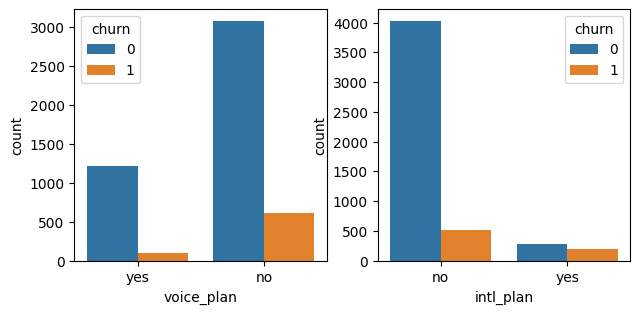

In [44]:
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
sns.countplot(x='voice_plan',hue='churn',data=tele)
plt.subplot(4,4,2)
sns.countplot(x='intl_plan',hue='churn',data=tele)

In [45]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(tele["intl_plan"],tele["churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

churn         0    1  Percentage Churn
intl_plan                             
no         4019  508         11.221560
yes         274  199         42.071882


In [46]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(tele["voice_plan"], tele["churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

churn          0    1  Percentage Churn
voice_plan                             
no          3072  605         16.453631
yes         1221  102          7.709751


#### From the above data we get
#### There are 4527 customers who dont have international plan and 473 customer have international plan.Among those who have intl plan 42% people churn
#### There is no relation between voice mail plan and churn


In [47]:
#show the data of 'voice messages' 
tele['voice_messages'].nunique()

48

In [48]:
#Show the details of 'voice messages' data
tele['voice_messages'].describe()

count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: voice_messages, dtype: float64

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='voice_messages', ylabel='Density'>

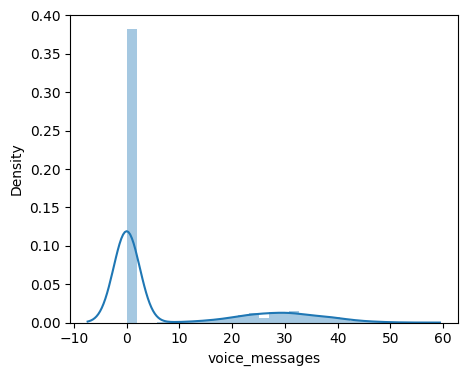

In [49]:
#Analysing by using displot diagram
plt.figure(figsize=[5,4])
sns.distplot(tele['voice_messages'])

#### After analyzing the above voice message feature data we get an insight that when there are more than 15,then there is a churn

In [50]:
#Printing the data of customer service calls 
tele['customer_calls'].value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: customer_calls, dtype: int64

<AxesSubplot:xlabel='customer_calls', ylabel='count'>

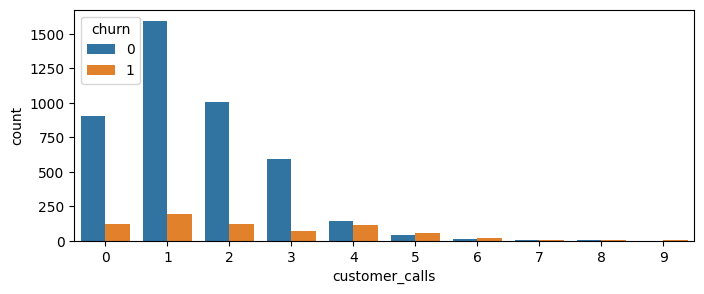

In [51]:
#Analysing using countplot
plt.figure(figsize=[8,3])
sns.countplot(x='customer_calls',hue="churn",data = tele)

In [52]:
#Calculating the Customer calls vs Churn percentage
Customer_calls = pd.crosstab(tele['customer_calls'],tele["churn"])
Customer_calls['Percentage_Churn'] = Customer_calls.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_calls)

churn              0    1  Percentage_Churn
customer_calls                             
0                902  121         11.827957
1               1596  190         10.638298
2               1005  122         10.825200
3                592   73         10.977444
4                141  111         44.047619
5                 38   58         60.416667
6                 12   22         64.705882
7                  6    7         53.846154
8                  1    1         50.000000
9                  0    2        100.000000


#### ***The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%, and customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.***

In [53]:
#Print the mean value of churned and not churned customer 
print(tele.groupby(["churn"])['day_calls'].mean())

churn
0     99.899604
1    100.817539
Name: day_calls, dtype: float64


In [54]:
print(tele.groupby(["churn"])['day_mins'].mean())

churn
0    175.746564
1    207.870580
Name: day_mins, dtype: float64


In [55]:
print(tele.groupby(["churn"])['day_charge'].mean())

churn
0    29.881958
1    35.338416
Name: day_charge, dtype: float64


<AxesSubplot:xlabel='day_mins', ylabel='day_charge'>

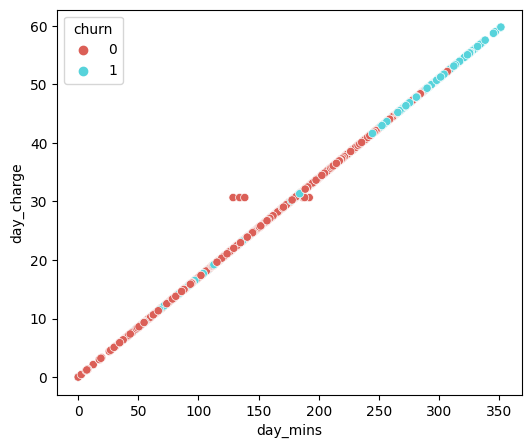

In [56]:
#show the relation using scatter plot
plt.figure(figsize=[6,5])
sns.scatterplot(x="day_mins", y="day_charge", hue="churn", data=tele,palette='hls')

#### Higher the day_charge,higher the day_mins,then higher the churn

In [57]:
#Print the mean value of churned and not churned customer 
print(tele.groupby(["churn"])['eve_calls'].mean())

churn
0    100.241556
1     99.884017
Name: eve_calls, dtype: float64


In [58]:
print(tele.groupby(["churn"])['eve_mins'].mean())

churn
0    198.755292
1    211.662179
Name: eve_mins, dtype: float64


In [59]:
print(tele.groupby(["churn"])['eve_charge'].mean())

churn
0    16.898654
1    17.999562
Name: eve_charge, dtype: float64


<AxesSubplot:xlabel='eve_mins', ylabel='eve_charge'>

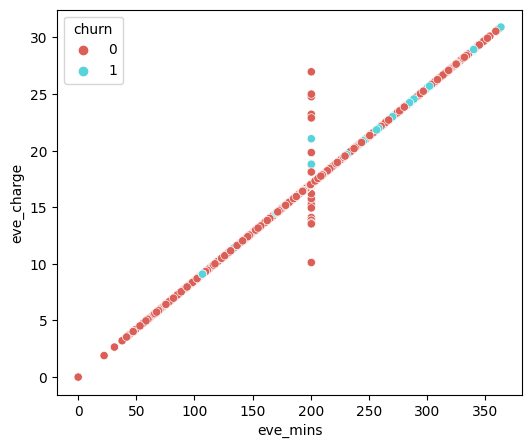

In [60]:
#show the relation using scatter plot
plt.figure(figsize=[6,5])
sns.scatterplot(x="eve_mins", y="eve_charge", hue="churn", data=tele,palette='hls')

In [61]:
#### no relation between eve charge and mins,and the model is also not good

In [62]:
#Print the mean value of churned and not churned customer 
print(tele.groupby(["churn"])['night_calls'].mean())

churn
0    99.975775
1    99.575672
Name: night_calls, dtype: float64


In [63]:
print(tele.groupby(["churn"])['night_mins'].mean())

churn
0    199.455113
1    206.078218
Name: night_mins, dtype: float64


In [64]:
print(tele.groupby(["churn"])['night_charge'].mean())

churn
0    8.975593
1    9.273607
Name: night_charge, dtype: float64


<AxesSubplot:xlabel='night_mins', ylabel='night_charge'>

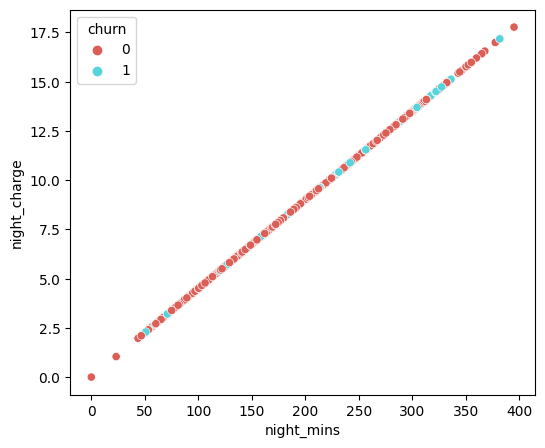

In [65]:
#show the relation using scatter plot
plt.figure(figsize=[6,5])
sns.scatterplot(x="night_mins", y="night_charge", hue="churn", data=tele,palette='hls')

In [66]:
#### no relation between night charge and mins.

In [67]:
#Print the mean value of churned and not churned customer 
print(tele.groupby(["churn"])['intl_mins'].mean())

churn
0    10.190869
1    10.692362
Name: intl_mins, dtype: float64


In [68]:
print(tele.groupby(["churn"])['intl_calls'].mean())

churn
0    4.481947
1    4.151344
Name: intl_calls, dtype: float64


In [69]:
print(tele.groupby(["churn"])['intl_charge'].mean())

churn
0    2.752055
1    2.887426
Name: intl_charge, dtype: float64


<AxesSubplot:xlabel='intl_mins', ylabel='intl_charge'>

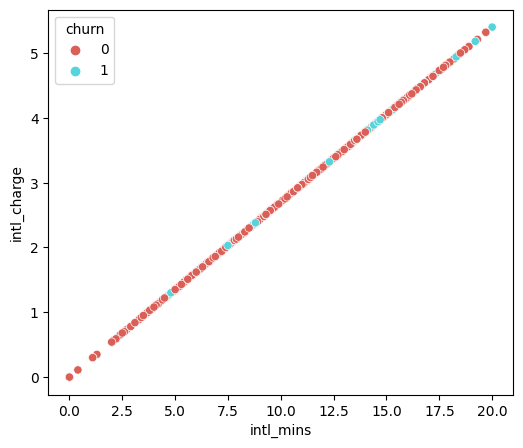

In [70]:
#show the relation using scatter plot
plt.figure(figsize=[6,5])
sns.scatterplot(x="intl_mins", y="intl_charge", hue="churn", data=tele,palette='hls')

In [71]:
#### Higher the intl mins,higher the charge also,so churn is high

In [72]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge = tele['day_charge'].mean()/tele['day_mins'].mean()
eve_charge = tele['eve_charge'].mean()/tele['eve_mins'].mean()
night_charge = tele['night_charge'].mean()/tele['night_mins'].mean()
int_charge = tele['intl_charge'].mean()/tele['intl_mins'].mean()

In [73]:
print([day_charge,eve_charge,night_charge,int_charge])

[0.17002433816647483, 0.08502489938709794, 0.04500054443394389, 0.27005022520459415]


<AxesSubplot:>

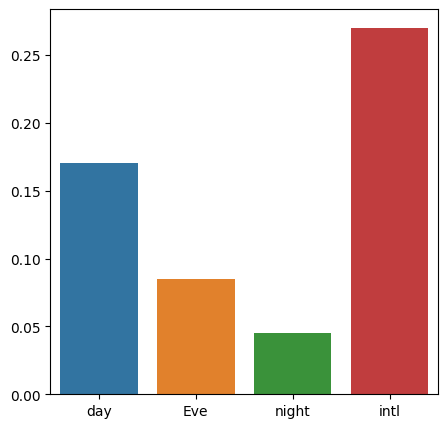

In [74]:
plt.figure(figsize=[5,5])
sns.barplot(x=['day','Eve','night','intl'],y=[day_charge, eve_charge, night_charge, int_charge])

### **CONCLUSION:**

### ***After performing exploratory data analysis on the data set, this is what we have incurred from data:***
### * ***There are some states where the churn rate is high as compared to others may be due to low network coverage.***
### ****Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns***
### ****In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge***
### ****IN the voice mail section when there are more than 20 voice messages then there is a churn so it basically means that the quality of voice message is not good***.
### ****In Customer  calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.***